# Budgeting Application

In this exercise, we're going to combine everything you have learned so far to build a budgeting application to help you plan our your financial future.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## Salary and Taxes

You just got a new job as an entry-level Data Scientist at a technology company in New York City with a decent starting salary of 85,000 dollars per year. Unfortunately, after state and local taxes, you can expect to be sending roughly 30% back to the government each year.

Calculate your monthly take home pay after taxes in order to begin budgeting.

Create variables for **salary** and **tax_rate**, given the information above:

In [0]:
salary = 85000
tax_rate = 0.30

Calculate and print your **salary_after_taxes** using the formula: *After tax = Before Tax * (1 - tax rate)*

In [0]:
salary_after_taxes = salary*(1 - tax_rate)
print("Salary after taxes: " + str(round(salary_after_taxes, 2)))

Salary after taxes: 59500.0


Now calculate and print your **monthly_takehome_salary** after taxes (Hint: You can use simple division in this case).

In [0]:
monthly_takehome_salary = salary_after_taxes / 12
print("Monthly takehome salary: " + str(round(monthly_takehome_salary, 2)))

Monthly takehome salary: 4958.33


## Monthly Expenses and Savings

In order to make it in New York City, you have decided to split a two-bedroom apartment with a friend. You will have to budget for rent, food and entertainment, but it's also a good idea to allocate an amount for unforeseen expenses each month. This unforeseen expenses budget could be used for anything ranging from new clothes or electronics to doctor appointments.

Your monthly budget as follows:

*   Rent: 1200 / month (Includes utilities)
*   Food: 30 / day (On average. Includes groceries and eating out.)
*   Entertainment: 200 / month (Movies, drinks, museums, parties...)
*   Unforeseen Expenses: 250 / month (Stay safe, and don't drop your phone!)

Assign variables for **monthly_rent**, **monthly_food_budget**, **monthly_entertainment_budget**, and **monthly_unforseen_expenses**.

In [0]:
monthly_rent = 1200
monthly_food_budget = 30 * 30
monthly_entertainment_budget = 200
monthly_unforeseen_expenses = 250

Calculate and print your total **monthly_expenses** as the sum of these inputs.

In [0]:
monthly_expenses = monthly_rent + monthly_food_budget + monthly_entertainment_budget + monthly_unforeseen_expenses
print("Monthly expenses: " + str(round(monthly_expenses, 2)))

Monthly expenses: 2550


Finally, calculate and print your **monthly_savings** as money leftover after your **monthly_expenses** have been deducted from your **monthly_takehome_salary**.

In [0]:
monthly_savings = monthly_takehome_salary - monthly_expenses
print("Monthly savings: " + str(round(monthly_savings, 2)))

Monthly savings: 2408.33


## Forecast Salary Growth and Cost of Living

Due to both inflation and increased productivity from experience, you can expect your salary to grow at different rates depending on your job. Now, since you are working in a growing and in-demand career field as a Data Scientist, you can assume a steady growth in your annual salary every year based on performance.

You can assume an annual salary growth rate of 5%, which is applied in smaller increments on a monthly basis instead of just one large increase at the end of each year. Imagine you'd like to find your expected salary after 15 years.

Start by setting up **forecast_months** for the total number of months in 15 years, and **annual_salary_growth** as provided above.

In [0]:
forecast_months = 12*15
annual_salary_growth = 0.05


Derive the equivalent **monthly_salary_growth** through the following formula: monthly *growth = (1 + annual growth) ^ (1/12) - 1*

In [0]:
monthly_salary_growth = (1+annual_salary_growth)**(1/12) - 1

Next, use the numpy functions **np.cumprod()** and **np.repeat()** to forecast the **cumulative_salary_growth** over the next 15 years. To do so, repeat (1+ the monthly salary growth) with the total forecasted months through the repeat function, then find the cumulative product.

In [0]:
cumulative_salary_growth_forecast = np.cumprod(np.repeat(1 + monthly_salary_growth, forecast_months))


Then multiply this value with your **monthly_takehome_salary** to find the **salary_forecast**

In [0]:
salary_forecast = monthly_takehome_salary*cumulative_salary_growth_forecast

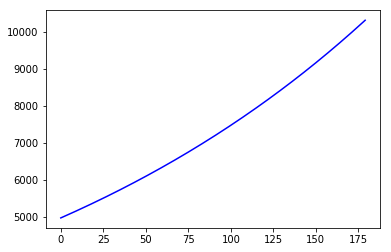

In [0]:
# Plot the forecasted salary
plt.plot(salary_forecast, color='blue')
plt.show()

By the end of 15 years, you are forecasted to make 175k! Neato!

## Forecast Growing Expenses Due to Inflation

Unfortunately, salary growth is only half of the story. 

You will also assume your monthly expenses will rise by an average of 2.5% per year due to inflation. This will lead to higher cost of living over time, paying for the same expenses each year but at a higher price. Luckily, your salary is growing faster than inflation, which means you should have more money going into savings each month.

Start by assigning the **annual_inflation**  and using that value to find the **monthly_inflation** rate. (hint: use the formula: monthly rate = (1 + annual rate) ^ 1/12 - 1)

In [0]:
annual_inflation = 0.025
monthly_inflation = (1+annual_inflation)**(1/12) - 1

Using the same methodology as we used in the salary growth, find the **cumulative_inflation_forecast**

In [0]:
cumulative_inflation_forecast = np.cumprod(np.repeat(1 + monthly_inflation, forecast_months))

Now we can derive your adjusted **expenses_forecast** by multiplying your **monthly_expenses** and **cumulative_inflation_forecast**

In [0]:
expenses_forecast = monthly_expenses*cumulative_inflation_forecast

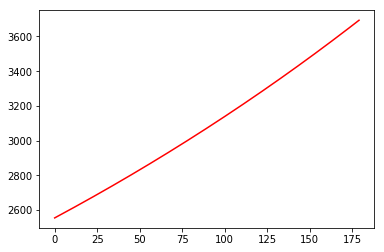

In [0]:
# Plot the forecasted expenses
plt.plot(expenses_forecast, color='red')
plt.show()

## Calculate Your Net Worth

Now that you have forecasted your savings and salary over time while taking career progression and inflation into account, you have constructed a time-series which you can use to calculate your cash flows, just like in Chapter 1.

For this example, all you need to do is subtract your forecasted monthly expenses from your forecasted monthly salary. The remaining cash flow will go straight into your savings account for each month.

You want to project your cumulative savings over time to see how effective your budgeting process will be given your projections.

Forecast your **savings_forecast** using projections for expenses and your monthly salary. This value should be equal to your **salary_forecast** less your **expenses_forecast**

In [0]:
savings_forecast = salary_forecast - expenses_forecast


Calculate your **cumulative_savings** over time, passing this **savings_forecast** through the `np.cumsum()` function.


In [0]:
cumulative_savings = np.cumsum(savings_forecast)


Calculate and print your **final_net_worth** after 15 years of diligent savings. This will be the last value in your **cumulative_savings **array.

In [0]:
final_net_worth = cumulative_savings[-1]
print("Your final net worth: " + str(round(final_net_worth, 2)))


Your final net worth: 762318.83


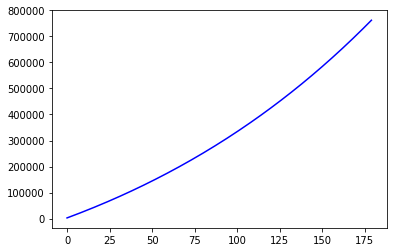

In [0]:
# Plot the forecasted savings
plt.plot(cumulative_savings, color='blue')
plt.show()

Your projections show that you can accumulate over $700,000 in just 15 years by following a strict budget and growing your salary steadily over time!

# So You Want To Be a Millionaire?

But - what if you want to be a millionaire in 15 years, retire young, sip margaritas and travel for the rest of your life? In order to do that, you're going to need to invest.

Remember the `.pmt()` function from numpy? You can use this function to calculate how much you need to save each month in order to accumulate your desired wealth over time.

Set the **investment_rate_annual** to 7% and the **investment_rate_monthly**, using: *month rate = (1 + annual rate) ^ 1/12 - 1*

Calculate and print the **required_monthly_investment** to amass $1,000,000 over 15 years using the `.pmt()` function, setting `rate` and `nper` using the information you've calculated above. Assuming you presently have 0 dollars.

In [0]:
investment_rate_annual = 0.07
investment_rate_monthly = (1+investment_rate_annual)**(1/12) - 1

required_investment_monthly = np.pmt(rate=investment_rate_monthly, nper=forecast_months, pv=0, fv=-1000000)
print("You will have to invest $" + str(round(required_investment_monthly, 2)) + " per month to amass $1M over 15 years")

You will have to invest $3214.35 per month to amass $1M over 15 years


# Investing a Percentage of Your Income

Unfortunately, you really can't afford to save 3,000 per month in order to amass 1,000,000 after only 15 years. In this exercise, you will lay the foundations to simulate this investing process over time.

But what you can do is start slowly, investing a 30% of your take-home income each month, which should grow over time as your income grows as well. Set this variable as **monthly_investment_percentage**.

In [0]:
monthly_investment_percentage = 0.30

You will also need an array for your **cash_flow_forecast**, which we're previously calculated as **savings_forecast**

In [0]:
cash_flow_forecast = savings_forecast

Using the **monthly_investment_percentage**, calculate **investment_deposit_forecast**, your monthly investment deposits for each period based on your **cash_flow_forecast** and **monthly_investment_percentage**.

In [0]:
# Calculate your monthly deposit into your investment account
investment_deposit_forecast = cash_flow_forecast * monthly_investment_percentage

Calculate your **savings_forecast_new** for each period. This is the money left over from **cash_flow_forecast** that you didn't invest.

In [0]:
# The rest goes into your savings account
savings_forecast_new = cash_flow_forecast * (1 - monthly_investment_percentage)

Finally, calculate your **cumulative_savings_new** over time, using the `np.cumsum()` function and **savings_forecast_new**.

Run the code provided to plot forecasted monthly savings vs investments.

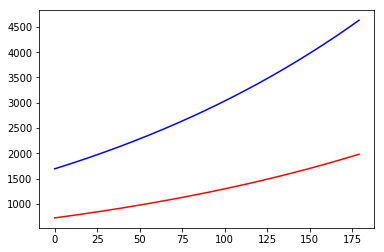

In [0]:
# Calculate your cumulative savings over time
cumulative_savings_new = np.cumsum(savings_forecast_new)

# Plot your forecasted monthly savings vs investments
plt.plot(investment_deposit_forecast, color='red')
plt.plot(savings_forecast_new, color='blue')
plt.show()

# Creating Your Portfolio

To finish up your investment simulation, you will need to loop through each time period, calculate the growth of any investments you have already made, add your new monthly deposit, and calculate your net worth at each point in time.

You can do it!

Cumulative savings (cumulative_savings_new) from the previous exercise is available, and investment_portfolio and net_worth are pre-allocated empty numpy arrays of length equal to forecast_months.

For each period, set your **previous_investment** equal to the previous value of **investment_portfolio**, unless it is the first iteration, in which case you have no investments yet.
Calculate your **net_worth** at each time period by summing your **cumulative_savings_new** and **investment_portfolio** at that same time period.

In [0]:
investment_portfolio = np.empty(shape = 180,)
net_worth = np.empty(shape = 180,)

In [0]:
# Loop through each forecast period
for i in range(forecast_months):
    
    # Find the previous investment deposit amount
    if i == 0: 
        previous_investment = 0
    else:
        previous_investment = investment_portfolio[i-1]
        
    # Calculate the value of your previous investments, which have grown
    previous_investment_growth = previous_investment*(1 + investment_rate_monthly)
    
    # Add your new deposit to your investment portfolio
    investment_portfolio[i] =  previous_investment_growth + investment_deposit_forecast[i]
    
    # Calculate your net worth at each point in time
    net_worth[i] = investment_portfolio[i] + cumulative_savings_new[i]

Run the provided code to see a plot of net worth vs. savings and investments.

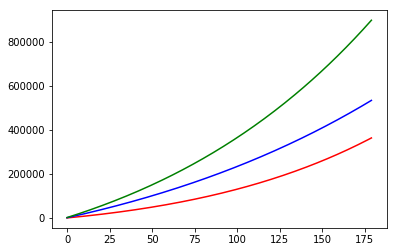

In [0]:
plt.plot(investment_portfolio, color='red')
plt.plot(cumulative_savings_new, color='blue')
plt.plot(net_worth, color='green')
plt.show()

# Inflation Adjusted Net Worth

By saving 30% per year, your simulation shows that you can accumulate $896,962.66. Not quite a millionaire, but not bad at all!

For the sake of simplicity, let's assume you were able to save $900,000 by following your budget.

But what if you retire 15 years from now? What is $900,000 going to be truly worth 15 years from now?

Set your **future_net_worth** equal to $900,000.
Set the **annual_inflation** rate equal to 2.5%. Do not compound inflation monthly.
Using` .pv()`, calculate the **inflation_adjusted_net_worth** 15 years from now.

In [0]:
# Set your future net worth
future_net_worth = 900000

# Set the annual inflation rate to 2.5%
annual_inflation = 0.025

# Calculate the present value of your terminal wealth over 15 years
inflation_adjusted_net_worth = np.pv(rate=annual_inflation, nper=15, pmt=0, fv=-1*future_net_worth)
print("Your inflation-adjusted net worth: $" + str(round(inflation_adjusted_net_worth, 2)))